#Analisis faktor risiko preeklampsia.

menganalisis hubungan antara faktor - faktor seperti riwayat hipertensi, obesitas dan jarak kelahiran terhadap status  preeklampsia. 
untuk melakukan analisis, berikut langkah - langkahnya : 
1. Eksplorasi data : melihat distribusi dari kolom PE/NON PE untuk mengetahui proporsi kasus preeklampsia dan non - preeklampsia. 
2. Analisis hubungan faktor risiko : membuat table kontingensi antara faktor risiko. Seperti riwayat hipertansi, obesitas, jarak kelahiran dengan status preeklampsia. 
3. Visualisasi : membuat grafik untuk memvisualisasikan hubungan antara faktor risko dan preeklampsia. 

Penjelasan PE, NON PE, PEB:
1. PE (Preeklampsia): Kondisi medis selama kehamilan yang ditandai dengan tekanan darah tinggi dan adanya protein dalam urin. Ini bisa berbahaya bagi ibu dan bayi jika tidak ditangani.
2. NON PE: Kehamilan tanpa komplikasi preeklampsia.
3. PEB (Preeklampsia Berat): Kondisi preeklampsia yang lebih serius dan dapat menyebabkan komplikasi lebih lanjut, seperti kerusakan organ.
4. Eklamsia: Bentuk preeklampsia yang parah, yang ditandai dengan kejang pada ibu hamil.

In [12]:
import pandas as pd

In [13]:
kasus_dataset = pd.read_excel(r"C:\Users\HP\Documents\data mining\dataset\dataKasus-1.xlsx")

In [14]:
#untuk menampilkan data
kasus_dataset.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [15]:
# Mengeksplorasi distribusi status PE/Non PE
pe_distribution = kasus_dataset['PE/Non PE'].value_counts()

# Mengeksplorasi hubungan faktor risiko dengan PE/Non PE
# Menghitung distribusi untuk riwayat hipertensi, obesitas, dan jarak kelahiran
hipertensi_pe = pd.crosstab(kasus_dataset['RIW HIPERTENSI'], kasus_dataset['PE/Non PE'])
obesitas_pe = pd.crosstab(kasus_dataset['OBESITAS'], kasus_dataset['PE/Non PE'])
jarak_kelahiran_pe = pd.crosstab(kasus_dataset['JARAK KELAHIRAN'], kasus_dataset['PE/Non PE'])

pe_distribution, hipertensi_pe, obesitas_pe, jarak_kelahiran_pe


(PE/Non PE
 Non PE                    520
 PEB                        20
 PE                         17
 Eklamsia                    1
 PE gemelli                  1
 PEB impending eklampsi      1
 PE                          1
 Name: count, dtype: int64,
 PE/Non PE       Eklamsia  Non PE  PE  PE   PE gemelli  PEB  \
 RIW HIPERTENSI                                               
 Tidak                  0     492   7    0           1    8   
 Ya                     1      28  10    1           0   12   
 
 PE/Non PE       PEB impending eklampsi  
 RIW HIPERTENSI                          
 Tidak                                0  
 Ya                                   1  ,
 PE/Non PE  Eklamsia  Non PE  PE  PE   PE gemelli  PEB  PEB impending eklampsi
 OBESITAS                                                                     
 Tidak             1     518  16    1           1   18                       1
 Ya                0       2   1    0           0    2                       0,
 PE/

#Distribusi Status Preeklampsia (PE/NON PE):
1. NON PE : 520 kasus
2. PEB : 20 kasus
3. PE : 17 kasus
4. Eklamsia : 1 kasus
5. PE gemelli : 1 kasus
6. PEB impending eklampsi : 1 kasus

#Hubungan Faktor Risiko dengan Status PE : 
1. Riwayat Hipertensi : 
- Pada ibu tanpa riwayat hipertensi, ada 492 kasus NON PE, 7 kasus PE dan 8 kasus PEB. 
- Pada ibu dengan riwayat hipertensi, terdapat peningkatan risiko : 28 kasus NON PE, 10 kasus PE dan PEB 12 kasus. 
2. Obesitas : 
- Pada ibu tanpa obesitas, mayoritas kasus adalah NON PE (518 kasus), sementara terdapat 16 kasus PE dan 18 kasus PEB. 
- Pada ibu dengan obesitas, meskipun risikonya lebih kecil, tetap ada  2  kasus NON PE, 1 kasus PE dan 2 kasus PEB. 
3. Jarak Kelahiran : 
- Pada ibu dengan jarak kelahiran < 2 tahun memiliki 1 kasus PE dan 4 kasus PEB.
- Pada ibu dengan jarak kelahiran >  2 tahun memiliki 8 kasus PE, 5 kasus PEB.
- Pada ibu dengan anak pertama, mayoritas kasus adalah NON PE (240 kasus ), namun ada juga 7 kasus PE dan 11 kasus PEB. 

#Kesimpulan Sementara : 
1. Riwayat Hipertensi terlihat sebagai faktor risiko yang kuat untuk PE dan PEB. 
2. Obesitas juga merupakan faktor risiko, namun lebih rendah dibandingkan riwayat hipertensi. 
3. Jarak kelahiran juga memengaruhi risiko PE, terutama jika jarak lebih pendek atau < 2 tahun. 


Visualisasi data menggunakan heatmap untuk memvisualisaskan hubungan antara faktor risiko dan status preeklampsia. Heatmap memberikan gambaran yang jelas tentang bagaimana faktor - faktor ini berkorelasi dengan status PE. 

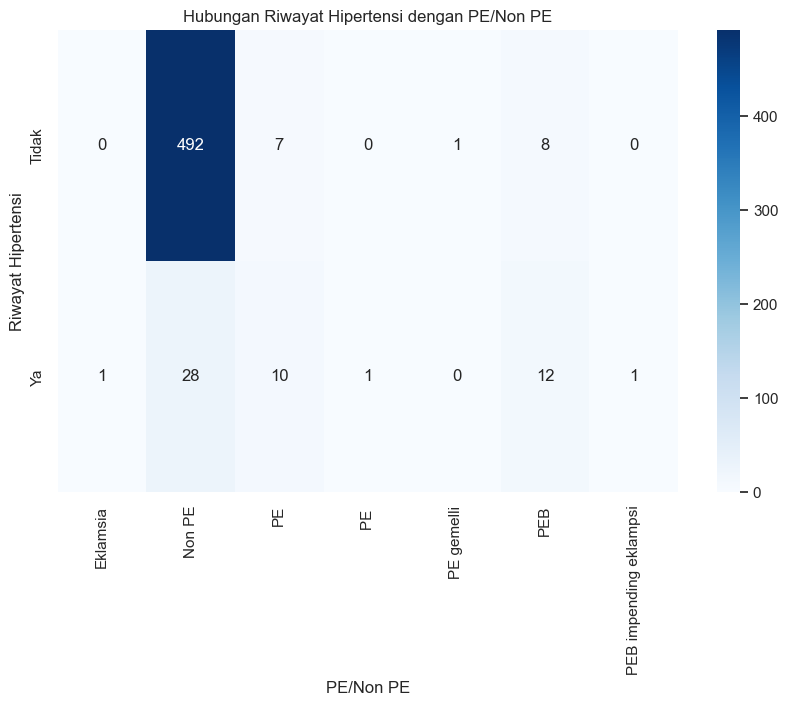

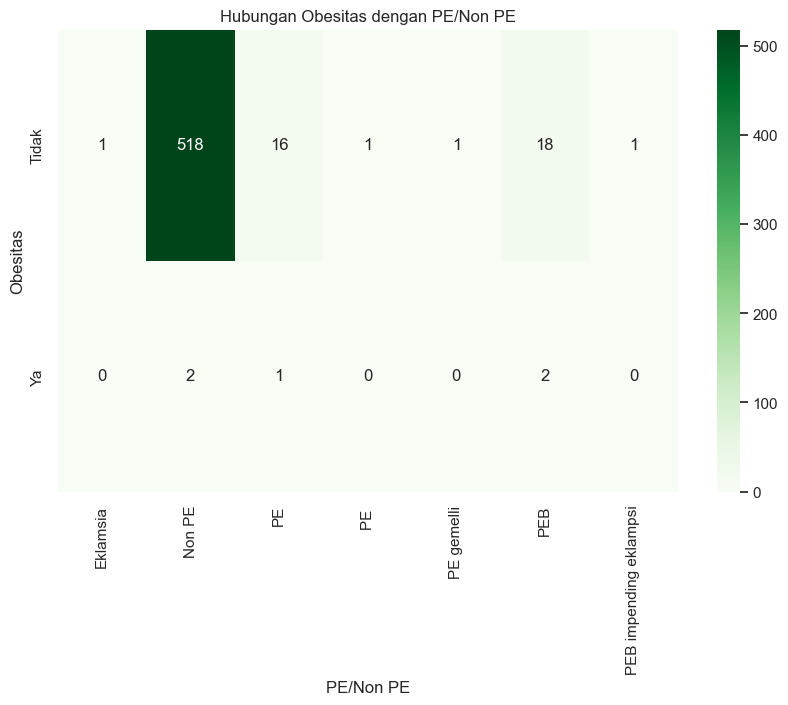

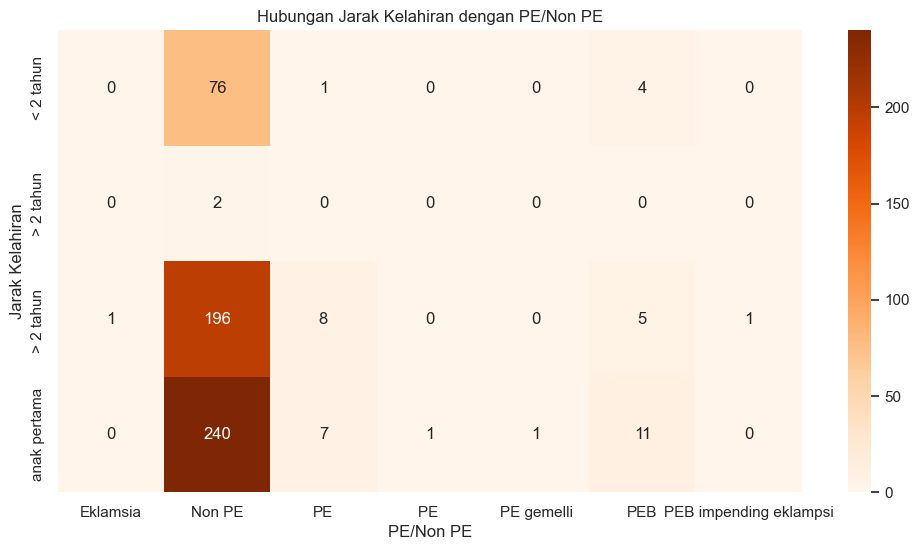

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# visualisasi hubungan riwayat hipertensi dengan PE/NON PE
plt.figure(figsize=(10, 6))
sns.heatmap(hipertensi_pe, annot=True, cmap="Blues", fmt='d')
plt.title("Hubungan Riwayat Hipertensi dengan PE/Non PE")
plt.ylabel("Riwayat Hipertensi")
plt.xlabel("PE/Non PE")
plt.show()

# visualisasi hubungan obesitas dengan PE/NON PE
plt.figure(figsize=(10, 6))
sns.heatmap(obesitas_pe, annot=True, cmap="Greens", fmt='d')
plt.title("Hubungan Obesitas dengan PE/Non PE")
plt.ylabel("Obesitas")
plt.xlabel("PE/Non PE")
plt.show()

# visualisasi hubungan jarak kelahiran dengan PE/NON PE
plt.figure(figsize=(12, 6))
sns.heatmap(jarak_kelahiran_pe, annot=True, cmap="Oranges", fmt='d')
plt.title("Hubungan Jarak Kelahiran dengan PE/Non PE")
plt.ylabel("Jarak Kelahiran")
plt.xlabel("PE/Non PE")
plt.show()


Visualisasi menggunakan heatmap membantu kita melihat hubungan antara variabel dengan lebih jelas. Setiap kotak dalam heatmap menunjukkan jumlah kasus dalam kategori tertentu. Misalnya, dalam heatmap untuk riwayat hipertensi, kita bisa melihat perbedaan jumlah kasus PE dan Non PE pada ibu dengan atau tanpa riwayat hipertensi. Warna yang lebih gelap mewakili jumlah kasus yang lebih tinggi.

Grafik ini membantu melihat pola distribusi secara visual antara faktor risiko dan status PE/Non PE.